# Project 3: Temperatures Dashboard

In this project, we will analyze a dataset with temperatures from 10 cities around the world extracting some interesting insights and developing two charts about them. We will be using once more Pandas and Matplotlib, but this time we will convert a column into timestamp date type, so we will be able to do some time sereis analysis and plots.

Data extracted from: https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities (with some cleaning and modifications).


### Project Tasks:

- `3.1.` Load the dataset from the defined data_path and display the first 5 rows.

- `3.2.` Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

- `3.3.` How many different countries are there? Provide a list of them.

- `3.4.` What is the minimum and maximum timestamps?

- `3.5.` What is the global minimum and maximum temperature? Find the city and the date of each of them.

- `3.6.` For a given city and a range of dates (start and end):
  - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of that city during the selected time period.
  - Make sure that all plots include a title, axis labels and a legend.

- `3.7.` Now repeat the previous question but for a list of cities instead of a single one:
  - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
  - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
  - Make sure that all plots include a title, axis labels and a legend.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Ex 3.1: Load the dataset from the defined data_path and display the first 5 rows.

data_path = "../data/cities_temperatures.csv"

temps_df = pd.read_csv(data_path)

temps_df.head()



,Country,City,AvgTemperatureFahrenheit,Date,Month,Year
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000


In [6]:
# Converting the date column to datetime date format in order to be able to analyze better the time series and plot it
temps_df["Date"] = pd.to_datetime(temps_df["Date"]).dt.date

In [11]:
# Ex 3.2: Create a new column called `AvgTemperatureCelsius` that contains the temperature in Celsius degrees.

# Convert temperature from Fahrenheit to Celsius
temps_df["AvgTemperatureCelsius"] = (temps_df["AvgTemperatureFahrenheit"] - 32) * 5/9

# Display the updated DataFrame
temps_df.head()






,Country,City,AvgTemperatureFahrenheit,Date,Month,Year,AvgTemperatureCelsius
0,Argentina,Buenos Aires,79.5,2000-01-01,1,2000,26.388889
1,Argentina,Buenos Aires,78.8,2000-01-02,1,2000,26.000000
2,Argentina,Buenos Aires,74.3,2000-01-03,1,2000,23.500000
3,Argentina,Buenos Aires,79.0,2000-01-04,1,2000,26.111111
4,Argentina,Buenos Aires,77.1,2000-01-05,1,2000,25.055556


In [ ]:
# Ex 3.3: How many different cities are there? Provide a list of them.

unique_cities_list = temps_df['City'].unique().tolist()  # TODO: this should be a list of unique countries

# TODO: print a message with the number of unique countries and the list of them

print(f"There are {len(unique_cities_list)} unique cities in the dataset:")
print(unique_cities_list)


There are 10 unique cities in the dataset:
['Buenos Aires', 'Canberra', 'Bogota', 'Cairo', 'Munich', 'Calcutta', 'Tokyo', 'Dakar', 'Capetown', 'Washington']


In [13]:
# Ex 3.4: What are the minimum and maximum dates?

min_date = temps_df['Date'].min()
max_date = temps_df['Date'].max()

# TODO: print a message with the min and max dates

print(f"The dataset ranges from {min_date} to {max_date}")


The dataset ranges from 2000-01-01 to 2019-12-31


In [17]:
# Ex 3.5: What are the global minimum and maximum temperatures? Find the city and the date of each of them.


# Global minimum temperature
min_temp = temps_df['AvgTemperatureCelsius'].min()
min_temp_row = temps_df.loc[temps_df['AvgTemperatureCelsius'] == min_temp].iloc[0]
min_temp_city = min_temp_row['City']
min_temp_date = min_temp_row['Date']

# Global maximum temperature
max_temp = temps_df['AvgTemperatureCelsius'].max()
max_temp_row = temps_df.loc[temps_df['AvgTemperatureCelsius'] == max_temp].iloc[0]
max_temp_city = max_temp_row['City']
max_temp_date = max_temp_row['Date']

# TODO: print a message with the min temperature, its city and date, and then another message with the max temperature, its city and date
print(f"The minimum temperature is {min_temp:.2f}°C in {min_temp_city} on {min_temp_date}") # using .2f to take only 2 values after the decimal.
print(f"The maximum temperature is {max_temp:.2f}°C in {max_temp_city} on {max_temp_date}")


The minimum temperature is -16.78°C in Munich on 2000-01-25
The maximum temperature is 37.89°C in Cairo on 2019-05-23


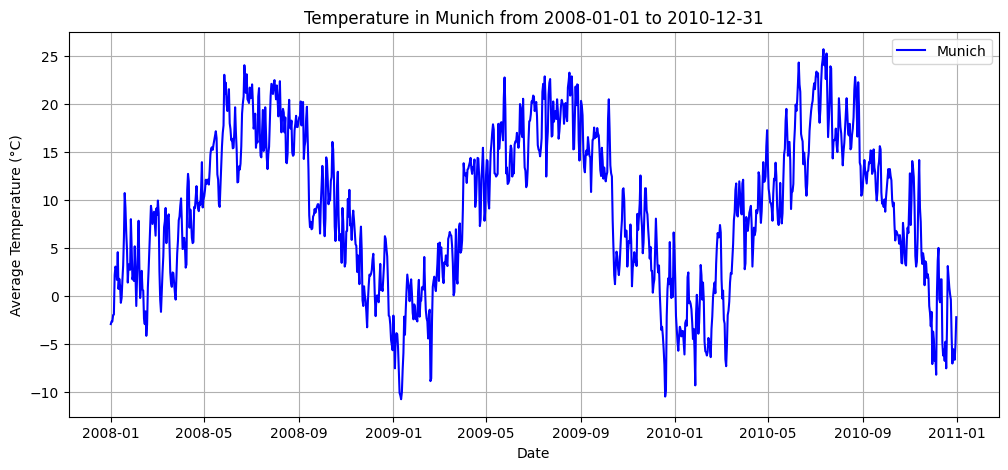

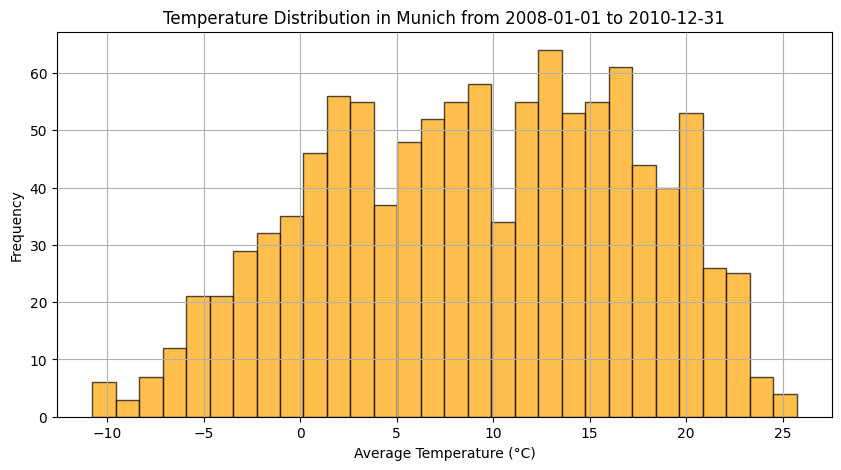

In [18]:
# Ex 3.6: For a given city and a range of dates (start and end):
#   - Make a line plot with the temperature reads of that city during the selected time period, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of that city during the selected time period.
#   - Make sure that all plots include a title, axis labels and a legend.

city = "Munich"
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()

# Filter the DataFrame for the selected city
city_df = temps_df[temps_df['City'] == city].copy()    # TODO: get a dataframe with the rows of the selected city

#Filter further for the selected date range
city_df_period = city_df[(city_df['Date'] >= start_date) & (city_df['Date'] <= end_date)]   # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date

# Line plot: temperature over time
plt.figure(figsize=(12, 5))
plt.plot(city_df_period['Date'], city_df_period['AvgTemperatureCelsius'], color='blue', label=city)
plt.title(f"Temperature in {city} from {start_date} to {end_date}")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

# Histogram: distribution of temperatures
plt.figure(figsize=(10, 5))
plt.hist(city_df_period['AvgTemperatureCelsius'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.title(f"Temperature Distribution in {city} from {start_date} to {end_date}")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()













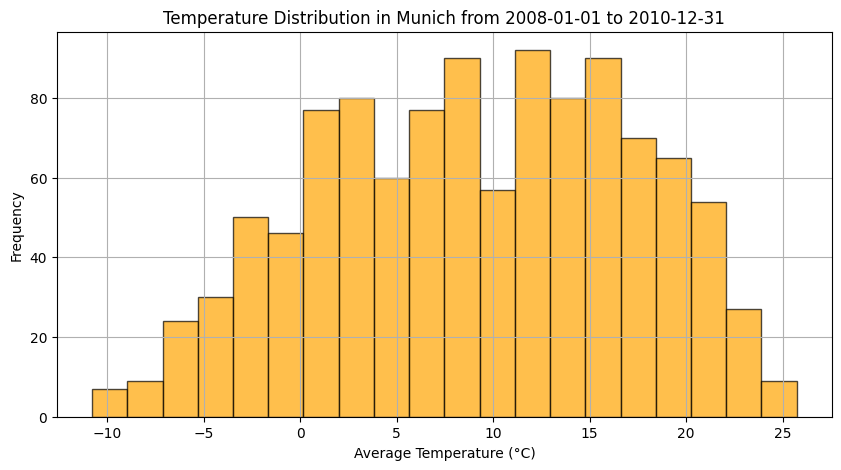

In [19]:
# TODO: Build the histogram plot using the city_df_period AvgTemperatureCelsius column as the data to plot


plt.figure(figsize=(10, 5))

# TODO: use the city_df_period AvgTemperatureCelsius column as the data to plot, you can use the parameter bins=20
plt.hist(
    city_df_period['AvgTemperatureCelsius'],  # data
    bins=20,                                 # number of bins
    color='orange',
    edgecolor='black',
    alpha=0.7
)

# Add title and axis labels
plt.title(f"Temperature Distribution in {city} from {start_date} to {end_date}") # plt.title()   # TODO

plt.xlabel("Average Temperature (°C)") # plt.xlabel()  # TODO

plt.ylabel("Frequency") # plt.ylabel()  # TODO

plt.grid(True)

plt.show()


<Figure size 1500x500 with 0 Axes>

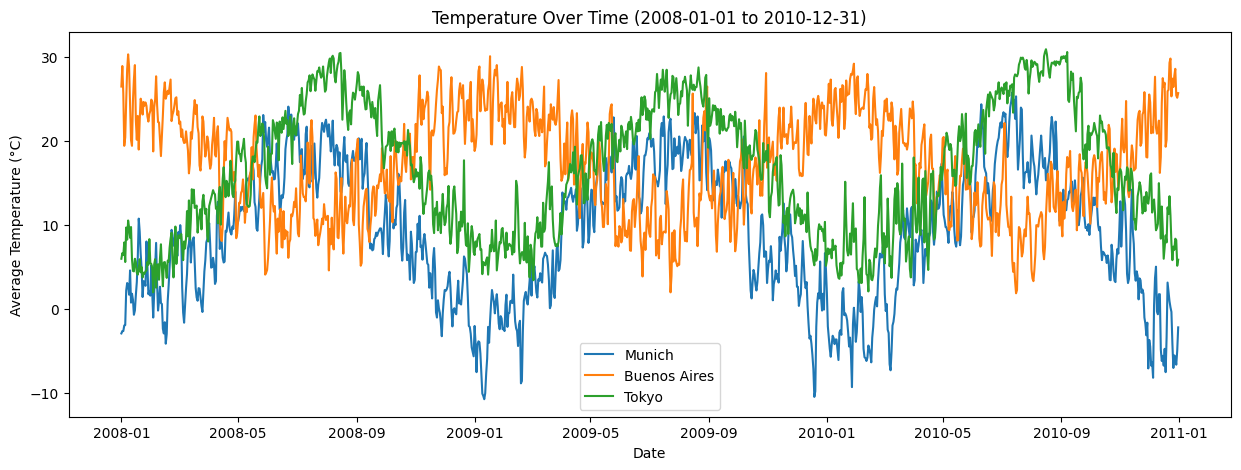

In [20]:
# Ex 3.7: Now repeat the previous question but for a list of cities:
#   - Make a line plot with the temperature reads of the cities in the list, for the selected time period, every city has to be a different line with a different color, the x axis has to be the timestamp column.
#   - Make a histogram of the temperature reads of a list of selected cities, for the selected time period, every city has to be its own distribution with a different color.
#   - Make sure that all plots include a title, axis labels and a legend.

selected_cities = ["Munich", "Buenos Aires", "Tokyo"]
start_date = pd.to_datetime("2008-01-01").date()
end_date = pd.to_datetime("2010-12-31").date()


plt.figure(figsize=(15, 5))

# TODO: Uncomment and complete the following lines to plot the line plot using the city_df_period AvgTemperatureCelsius column as the y axis and the Date column as the x axis

plt.figure(figsize=(15, 5))

for city in selected_cities:
    #TODO: get a dataframe with the rows of the selected city
    city_df = temps_df[temps_df["City"] == city] 

    # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
    city_df_period = city_df[ 
        (city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)
    ]

    # TODO plot each city line and use the label parameter to set the legend name for each city

    plt.plot(  
        city_df_period["Date"],
        city_df_period["AvgTemperatureCelsius"],
        label=city
    )

# Titles and labels
plt.title(f"Temperature Over Time ({start_date} to {end_date})")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")

plt.legend()
plt.show()


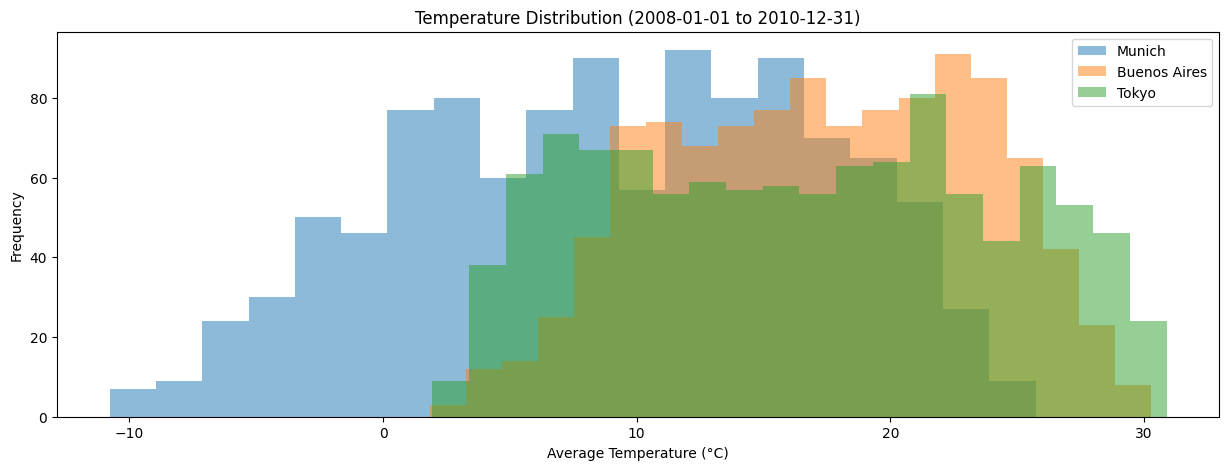

In [23]:
# TODO: Build the histogram plot for the selected cities using the city_df_period AvgTemperatureCelsius column as the data to plot for each one


# for city in selected_cities:
#     city_df = None            # TODO: get a dataframe with the rows of the selected city
#     city_df_period = None     # TODO: get a dataframe with the rows of the selected city and the selected period of time using the Date column and any of the <, >, <=, >= operators to compare with start_date and end_date
#     plt.hist()                    # TODO: plot each city histogram in the same plot and use the label parameter to set the legend name for each city 


plt.figure(figsize=(15, 5))

for city in selected_cities:
    # Filter rows for the selected city
    city_df = temps_df[temps_df["City"] == city]

    # Filter rows for the selected time period
    city_df_period = city_df[
        (city_df["Date"] >= start_date) & (city_df["Date"] <= end_date)
    ]

    # Plot histogram for each city
    plt.hist(
        city_df_period["AvgTemperatureCelsius"],
        bins=20,
        alpha=0.5,
        label=city
    )

# Titles and labels
plt.title(f"Temperature Distribution ({start_date} to {end_date})")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.show()